In [1]:
%pylab inline
from app.analysis import Quote
bonds = Quote.screen_funds('Bonds', 'Domestic', 'Government', 'Long-Term')
growth = Quote.screen_funds('Equities', 'Domestic', 'Large-Cap', 'Growth')
blend = Quote.screen_funds('Equities', 'Domestic', 'Large-Cap', 'Blend', min_assets=10)
print(len(bonds), len(growth), len(blend))
quote = Quote(bonds + growth + blend + ['TMF', 'SPXL'], 50, 5)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

Populating the interactive namespace from numpy and matplotlib
6 16 14
from 2019-07-05 to 2019-09-13 - 38


In [2]:
stats = quote.statistics()
assert stats[stats['len'] < stats['len'].max()].empty
stats = stats[stats['shrp'] > 0]
print(len(stats))
stats.sort_values('mean', ascending=False)

27


,len,mean,std,shrp,yield,drawdown
Symbols,,,,,,
TMF,46,0.361008,1.667874,0.212403,8.138600,21.336457
EDV,46,0.184965,0.772000,0.230854,5.053923,9.958848
TLT,46,0.133025,0.559352,0.225760,3.491465,7.455031
VGLT,46,0.129611,0.542094,0.226648,3.419894,7.244504
SPTL,46,0.129188,0.543668,0.225214,3.331802,7.278710
TLH,46,0.084189,0.354767,0.218292,2.052013,5.073982
VIG,46,0.061188,0.350034,0.155534,3.048676,5.300177
IEF,46,0.050699,0.217945,0.201669,1.177338,3.282276
SPLV,46,0.035308,0.244579,0.116782,1.723635,3.597581


evicted SPLV 0.809 -0.178
retry backlogs ['SCHX', 'SPY', 'IWB', 'VUG', 'VV', 'VGLT', 'IWF', 'VTI', 'TMF', 'TLT', 'SCHB', 'VONG', 'USMV', 'IVV', 'IWY', 'ITOT', 'SCHG', 'TLH', 'SPTL', 'VOO', 'MGK', 'QQQ', 'EDV', 'RSP'] at 0.905/-0.51 - 0.4
retry backlogs ['SCHX', 'SPY', 'IWB', 'VV', 'VUG', 'VGLT', 'IWF', 'VTI', 'TMF', 'TLT', 'SPTL', 'VONG', 'SCHB', 'IWY', 'ITOT', 'SCHG', 'USMV', 'IVV', 'VOO', 'MGK', 'IEF', 'QQQ', 'EDV', 'RSP'] at 0.910/-0.52 - 0.419
evicted USMV 0.909 -0.297
retry backlogs ['SCHX', 'SPY', 'IWB', 'VV', 'VUG', 'VGLT', 'IWF', 'VTI', 'TMF', 'TLT', 'SPTL', 'VONG', 'SCHB', 'IWY', 'ITOT', 'SCHG', 'IVV', 'VOO', 'MGK', 'IEF', 'QQQ', 'EDV', 'RSP'] at 0.915/-0.53 - 0.419
retry backlogs ['SCHX', 'SPY', 'VV', 'IWB', 'VUG', 'IWF', 'VTI', 'TMF', 'VONG', 'IVV', 'IWY', 'ITOT', 'SCHG', 'SCHB', 'VOO', 'SPTL', 'EDV', 'TLT', 'MGK', 'QQQ', 'TLH', 'VGLT', 'RSP'] at 0.920/-0.54 - 0.4
retry backlogs ['SCHX', 'SPY', 'VV', 'IWB', 'VUG', 'IWF', 'VTI', 'TMF', 'VONG', 'IVV', 'IWY', 'ITOT', 'SCHG', 'S

,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,46.0,0.072560,0.158760,-0.440466,0.001259,0.084789,0.176810,0.369271,0.414552,2.536391,2.179167
TLH,46.0,0.084189,0.354767,-0.865520,-0.107018,0.098239,0.290003,0.831848,0.218292,2.052013,5.073982
VIG,46.0,0.061188,0.350034,-1.073264,-0.159695,0.113554,0.279355,0.626646,0.155534,3.048676,5.300177


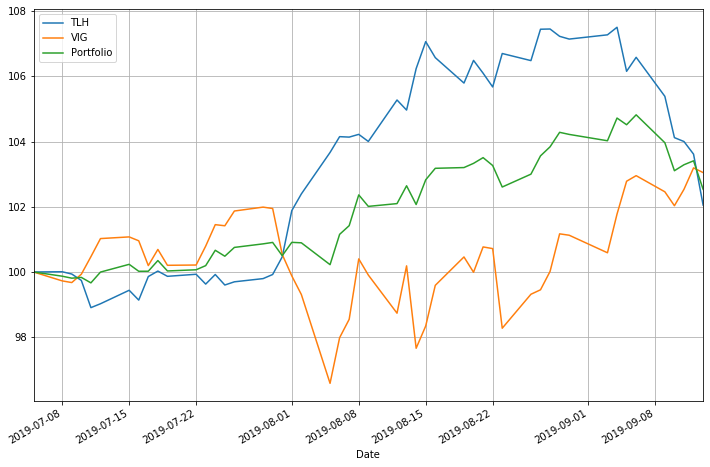

In [3]:
quote.setup_mask(stats.index)
sd = quote.optimize_portfolio()
quote.setup_mask(['VGLT', 'MGK'])
sd.update(quote.optimize_portfolio())
quote.setup_mask(['TMF', 'SPXL'])
sd.update(quote.optimize_portfolio())
quote.setup_mask({e for r in sd.values() for e in r})
sd.update(quote.optimize_portfolio())
for e in sd:
    print(e, sd[e])
_, ratio = sd.peekitem()
quote.setup_mask(ratio)
quote.graph(ratio)

,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,46.0,0.078979,0.223275,-0.680711,-0.021330,0.083642,0.230396,0.495878,0.323517,2.485289,3.350198
VGLT,46.0,0.129611,0.542094,-1.268469,-0.151781,0.144766,0.475257,1.193642,0.226648,3.419894,7.244504
MGK,46.0,0.029024,0.408120,-1.263629,-0.178664,0.039472,0.303018,0.751242,0.054586,1.550683,6.584789


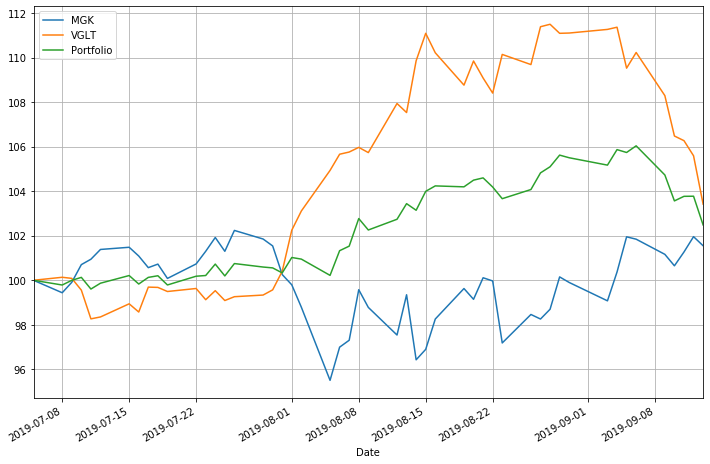

In [5]:
quote.setup_mask(['MGK', 'VGLT'])
quote.graph({'MGK': 0.50, 'VGLT': 0.50})

,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,46.0,0.172485,0.623813,-1.895338,-0.120708,0.195737,0.568297,1.292615,0.265687,3.959573,9.312613
TMF,46.0,0.361008,1.667874,-3.964845,-0.525058,0.398185,1.401037,3.658630,0.212403,8.138600,21.336457
SPXL,46.0,-0.007426,1.193853,-3.504356,-0.733599,0.157360,0.771222,1.798255,-0.011871,-0.055571,17.958381


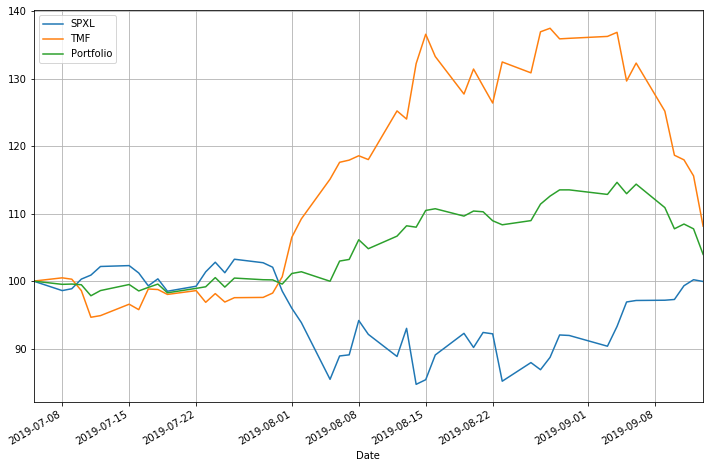

In [6]:
quote.setup_mask(['SPXL', 'TMF'])
quote.graph({'SPXL': 0.51, 'TMF': 0.49})